In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

/tmp/ipykernel_56824/1505719282.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('./assets/employees.csv')

In [4]:
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [5]:
check_nan = df.isnull().any()
check_nan

First Name            True
Gender                True
Start Date           False
Last Login Time      False
Salary               False
Bonus %              False
Senior Management     True
Team                  True
dtype: bool

In [6]:
delete_nan = df.dropna()
delete_nan

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
994,George,Male,6/21/2013,5:47 PM,98874,4.479,True,Marketing
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [7]:
delete_nan.isnull().values.any()

False

In [8]:
team_counts = delete_nan.groupby(['Team']).count()
team_counts

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management
Team,,,,,,,
Business Development,88,88,88,88,88,88,88
Client Services,85,85,85,85,85,85,85
Distribution,60,60,60,60,60,60,60
Engineering,79,79,79,79,79,79,79
Finance,80,80,80,80,80,80,80
Human Resources,76,76,76,76,76,76,76
Legal,67,67,67,67,67,67,67
Marketing,74,74,74,74,74,74,74
Product,83,83,83,83,83,83,83


In [9]:
team_info = delete_nan.groupby('Team')['Salary'].agg(['min', 'mean', 'max']).sort_values(by='mean')
team_info

,min,mean,max
Team,,,
Distribution,35575,85849.100000,149105
Product,35013,86935.963855,149684
Legal,35061,88066.402985,148985
Client Services,35095,89336.658824,147183
Business Development,36844,90520.397727,147417
Marketing,36643,90764.081081,146812
Human Resources,35203,91145.171053,149903
Sales,35802,91724.819444,144887
Engineering,36946,94369.405063,147362


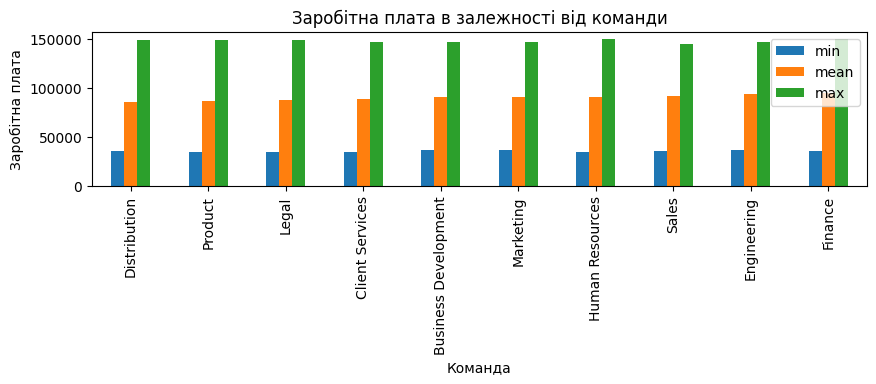

In [10]:
team_info.plot(kind='bar', figsize=(10, 2))
plt.title('Заробітна плата в залежності від команди')
plt.xlabel('Команда')
plt.ylabel('Заробітна плата')
plt.show()

In [11]:
gender_bonus_avg = delete_nan.groupby('Gender')['Bonus %'].median()
gender_bonus_avg

Gender
Female     9.375
Male      10.169
Name: Bonus %, dtype: float64

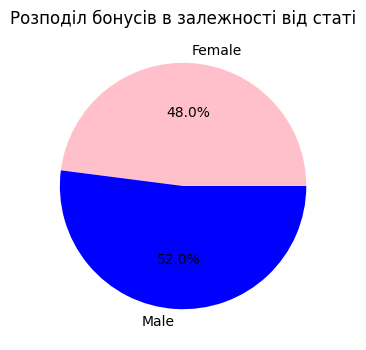

In [12]:
gender_bonus_avg.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'blue'], figsize=(10, 4), legend=False)
plt.title('Розподіл бонусів в залежності від статі')
plt.ylabel('')
plt.show()

In [13]:
df = pd.read_csv('./assets/nba.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [14]:
df.isnull().any()

Name        True
Team        True
Number      True
Position    True
Age         True
Height      True
Weight      True
College     True
Salary      True
dtype: bool

In [15]:
df = df.dropna()

In [16]:
df.isnull().any()

Name        False
Team        False
Number      False
Position    False
Age         False
Height      False
Weight      False
College     False
Salary      False
dtype: bool

In [17]:
df['Weight'] *= 0.45359237
df

/tmp/ipykernel_56824/3344734492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] *= 0.45359237


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,81.646627,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,106.594207,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,83.914588,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,106.594207,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,107.954984,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,93.440028,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,93.440028,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,106.140615,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,92.079251,Butler,2433333.0


In [18]:
def convert_to_cm(df):
    for height in df['Height']:
        feet, inches = map(int, height.split('-'))
        cm = feet * 30.48 + inches * 2.54
        df['Height'] = cm

    return df

In [19]:
df = convert_to_cm(df)
df

/tmp/ipykernel_56824/4240248099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'] = cm


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,213.36,81.646627,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,213.36,106.594207,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,213.36,83.914588,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,213.36,106.594207,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,213.36,107.954984,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,213.36,93.440028,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,213.36,93.440028,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,213.36,106.140615,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,213.36,92.079251,Butler,2433333.0


In [23]:
team_count_df = df.groupby('Team').size().reset_index(name='Count')
team_count_df

,Team,Count
0,Atlanta Hawks,11
1,Boston Celtics,12
2,Brooklyn Nets,13
3,Charlotte Hornets,13
4,Chicago Bulls,12
5,Cleveland Cavaliers,11
6,Dallas Mavericks,12
7,Denver Nuggets,9
8,Detroit Pistons,15
9,Golden State Warriors,12


In [26]:
team_info = df.groupby('Team')['Salary'].agg(['min', 'mean', 'max']).reset_index()
team_info = result_df.sort_values(by='mean')
team_info

,Team,min,mean,max
22,Philadelphia 76ers,525093.0,2.213778e+06,6500000.0
17,Minnesota Timberwolves,947276.0,2.663774e+06,5758680.0
24,Portland Trail Blazers,525093.0,3.220121e+06,8042895.0
13,Los Angeles Lakers,700000.0,3.270445e+06,15592217.0
23,Phoenix Suns,55722.0,3.457318e+06,13500000.0
1,Boston Celtics,1148640.0,3.461756e+06,7730337.0
2,Brooklyn Nets,134215.0,3.654087e+06,19689000.0
21,Orlando Magic,845059.0,3.788729e+06,11250000.0
3,Charlotte Hornets,189455.0,3.978124e+06,12000000.0
11,Indiana Pacers,211744.0,4.004800e+06,17120106.0


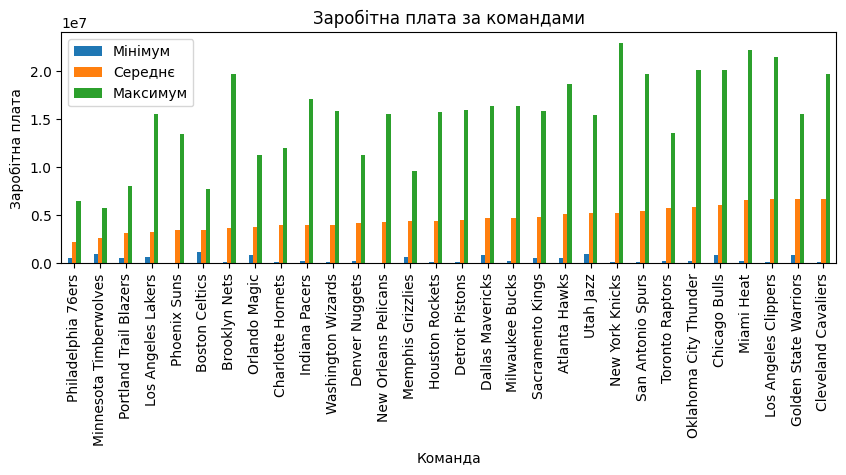

In [32]:
team_info.plot(x='Team', kind='bar', figsize=(10, 3))
plt.title('Заробітна плата за командами')
plt.xlabel('Команда')
plt.ylabel('Заробітна плата')
plt.legend(['Мінімум', 'Середнє', 'Максимум'])
plt.show()

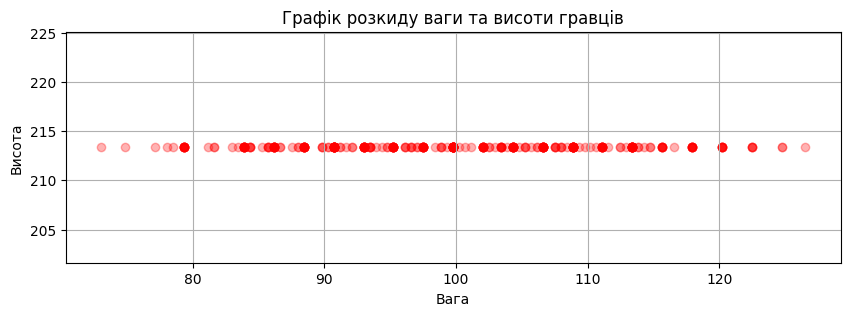

In [45]:
plt.figure(figsize=(10, 3))
plt.scatter(df['Weight'], df['Height'], color='red', alpha=0.3)
plt.title('Графік розкиду ваги та висоти гравців')
plt.xlabel('Вага')
plt.ylabel('Висота')
plt.grid(True)
plt.show()

In [52]:
position_age_df = df.groupby('Position')['Age'].mean().reset_index()
position_age_df

,Position,Age
0,C,26.857143
1,PF,26.679012
2,PG,26.750000
3,SF,26.732394
4,SG,26.206897


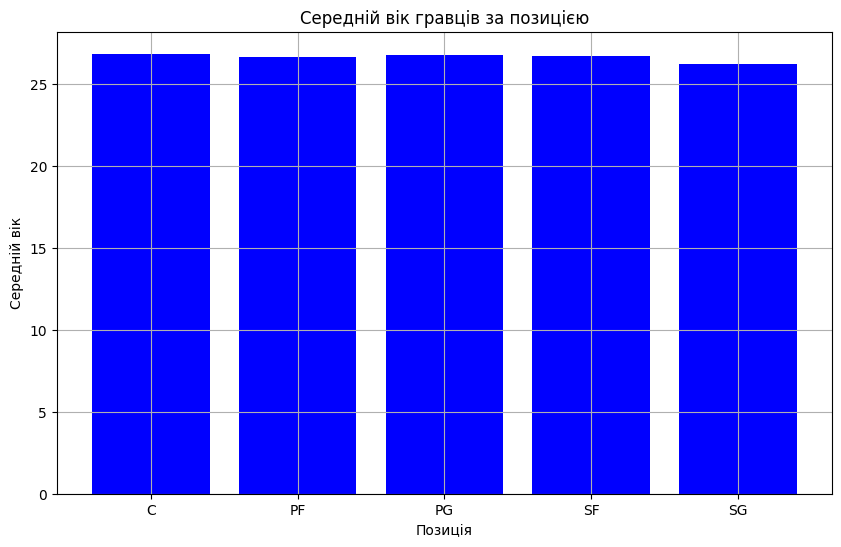

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(position_age_df['Position'], position_age_df['Age'], color='blue')
plt.title('Середній вік гравців за позицією')
plt.xlabel('Позиція')
plt.ylabel('Середній вік')
plt.grid(True)
plt.show()